# Visualization with `matplotlib`

    
    CREDIT: These notes are based on the book "Data Science from Scratch" published by O'Reilly.

You can use this notebook while you are reading [Visualizing Data](http://cs.wellesley.edu/~eni/cs234/chapter3-visualize.html).

As you have seen in the data science cycle, we'll be doing visualizations for two purposes:  

1. data exploration
2. communicating data 

The most well-known Python library for visualizations is `matplotlib`, which was developed as a free, open-source response to Matlab. `matplotlib` is very powerful and can create static visualizations that cannot be easily created with other tools. You can see some of these complex visualizations in the [Matplotlib's Gallery](https://matplotlib.org/gallery.html). However, because `matplotlib` provides a great level of control about every aspect of a visualization, it is not idealf for fast data exploration. Therefore, we will also discuss `seaborn` and `plotly express` (in separate notebooks).

**Table of content**
1. [Simple Plotting](#sec1)
2. [Styles](#sec2)
3. [Bar Charts](#sec3)
4. [A histogram is a bar plot](#sec4)
5. [Line Charts](#sec5)
6. [Scatterplots](#sec6)

<a id="sec1"></a>
## 1. Simple Plotting

The library that is involved in plotting is `pyplot`, which is often renamed as `plt`. 
To create a plot we usually follow three steps:

1. Prepare the data as x and y lists or arrays
2. Call the appropriate plotting functions with certain arguments for plotting
3. Perform decoration of the chart: titles, axes, labels, etc.

In [1]:
from matplotlib import pyplot as plt

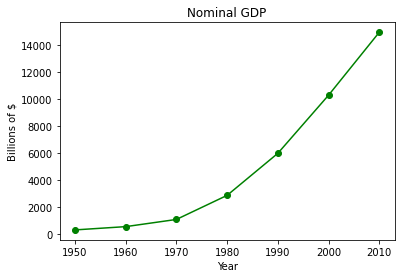

In [2]:
# the x and y data for the 2D plot
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3] 

# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid') 

# Reminder: the named parameters above: color, marker, linestyle, can be omitted
# and the statement can be written as: plt.plot(years, gdp, 'go-') 

# add a title
plt.title("Nominal GDP")

# add labels for the axes
plt.xlabel("Year")
plt.ylabel("Billions of $")
plt.show()

<a id="sec2"></a>
## 2. Styles
The classic style of `matplotlib` leaves much to desire. Starting with version 1.5.1, it's possible to style the plots to look differently.  
You can check what styles are available as shown below:

In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


To choose one of these styles, use the instruction below:

In [4]:
plt.style.use('ggplot')

Let's replot the graph from above in this ggplot-style. The code hasn't changed, but the environment where the plotting is being done has and as a result the plot will look nicer.

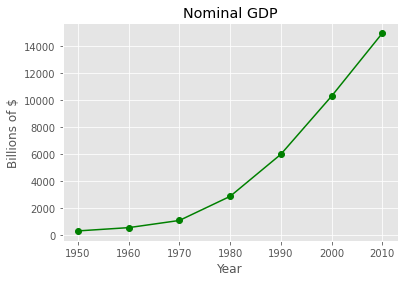

In [5]:
# the x and y data for the 2D plot
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3] 

# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid') 

# add a title
plt.title("Nominal GDP")

# add labels for the axes
plt.xlabel("Year")
plt.ylabel("Billions of $")
plt.show()

<a id="sec3"></a>
## 3. Bar Charts
A bar chart is a good choice when you want to show how some quantity varies among some discrete set of items. 

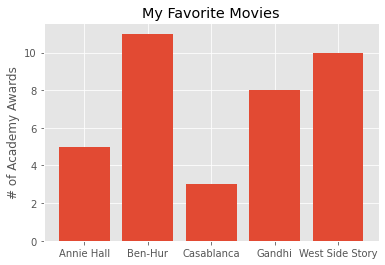

In [6]:
# data
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
numOscars = [5, 11, 3, 8, 10]

# when plotting bars, the x-axis doesn't have numerical values, we need to generate them
# this is why we use range(len(movies)) in the line below
plt.bar(range(len(movies)), numOscars)
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")

# label x-axis with movie names by providing indices 0, 1, 2, etc. and labels for each tick
plt.xticks(range(len(movies)), movies)
plt.show()

<a id="sec4"></a>
## 4. A histogram is a bar plot

A histogram represents the distribution of some numerical data. It's often used to summarize data.  
`matplotlib` has a method `.hist()` that will automatically generate a histogram from a list of data points,  
as shown in the following example:

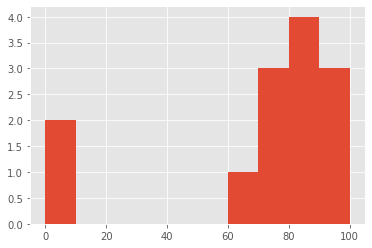

In [7]:
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]
plt.hist(grades)
plt.show()

You can use this method whenever you want to quickly show the data.

Visually, a histogram is a bar chart. Indeed, one can create even more sophisticated histograms  
by using the `bar()` function directly as shown in the example below. 

However, in order to create the histogram, we first need to specify the values for each bin.  
Here is some efficient Python code to do it:

In [8]:
from collections import Counter

grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

# create a lambda function to get the decile of a number. 
# For example, 85 will be converted to 80, and so on.
decile = lambda value: (value // 10) * 10 # notice integer division operator // that floors a value

histogram = Counter([decile(grade) for grade in grades])
print(histogram)

Counter({80: 4, 70: 3, 90: 2, 0: 2, 100: 1, 60: 1})


So, the variable `histogram` contains the deciles as keys, and the counts for each decile as values. We will use the keys of the dictionary as x-values and the values of the dictionary as y-values for the bar chart.

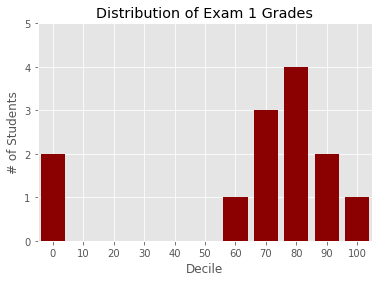

In [9]:
plt.bar(histogram.keys(),                  # specify x-axis values
        histogram.values(),                # specify y-axis values
        8,                                 # give each bar a width of 8
        color='darkred')                   # color for bars.

plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105, y-axis from 0 to 5
plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students") 
plt.title("Distribution of Exam 1 Grades") 
plt.show()

Hopefully you agree that this histogram looks nicer than the one created by the function `hist` above.

### Lying with a chart

The above example used the `axis` function to set the intervals of values for x and y dimensions.  
When someone is trying to mislead the public, they can decide to start the y value at a number different from 0.  
See how it looks like in the example below:

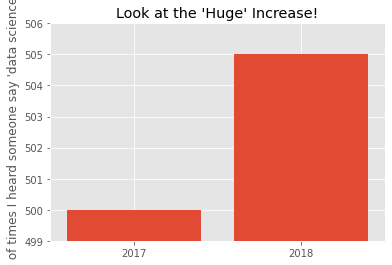

In [10]:
years = [2017, 2018]
mentions = [500, 505] 

plt.bar(years, mentions)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

# misleading y-axis only shows the part above 500
plt.axis([2016.5,2018.5,499,506])

plt.title("Look at the 'Huge' Increase!")
plt.show()

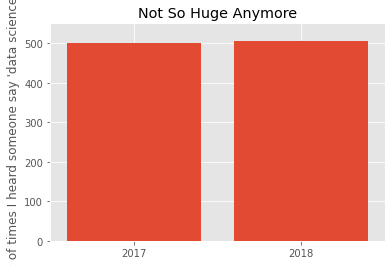

In [11]:
plt.bar(years, mentions) 
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

# fair representation for the axis
plt.axis([2016.5, 2018.5, 0, 550])
plt.title("Not So Huge Anymore")
plt.show()

<a id="sec5"></a>
## 5. Line Charts

Line charts are a good visualization for showing trends. Most importantly, we can have multiple lines in  
one chart for comparison purposes, as shown in the example below.

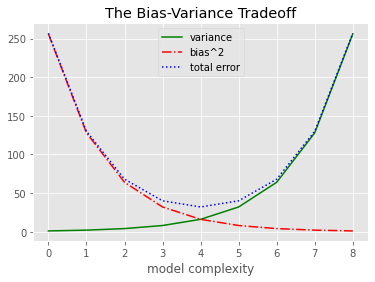

In [12]:
# the data points for the lines (the y-axis)
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
biasSquared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
totalError = [x + y for x, y in zip(variance, biasSquared)] 

# an example to show the use of list comprehension and the enumerate function
xs = [i for i, _ in enumerate(variance)]

# we can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance, 'g-', label='variance')       # green solid line 
plt.plot(xs, biasSquared, 'r-.', label='bias^2')    # red dot-dashed line 
plt.plot(xs, totalError, 'b:', label='total error') # blue dotted line

# because we've assigned labels to each series 
# we can get a legend for free
# loc = 9 means "top center"
plt.legend(loc = 9)
plt.xlabel("model complexity")
plt.title("The Bias-Variance Tradeoff")
plt.show()

<a id="sec6"></a>
## 6. Scatterplots

Scatterplots are a good way to visualize the relationship between two paired sets of data.  
Below is an example that illustrates the relationship between the numbers of friends a user has and the number of minutes they spend on the website per day.

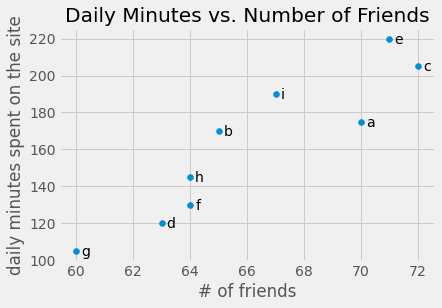

In [13]:
# changing to a new plot style, just for fun
plt.style.use('fivethirtyeight')

# data
friends = [ 70,  65,  72,  63,  71,  64,  60,  64,  67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels =  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes): 
    plt.annotate(label,
                 xy = (friend_count, minute_count),   # put the label with its point 
                 xytext = (5, -5),                    # but slightly offset 
                 textcoords='offset points')
    
plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

This style is the historical style of the data-driven website [538](https://fivethirtyeight.com/), famous for election predictions.

### Scatterplot for comparable variables

In the example above, the two variables were different, thus, we didn't care for the range of values shown in the graph. However, if we have two comparable variables (e.g., temperatures in two different places, or grades in different exams), allowing matplotlib to automatically choose the scale for the axes might produce a misleading picture, as shown in the example below:

/var/folders/x1/c108dqc11n9fpdr0r4rg08t40000gn/T/ipykernel_23392/2295127047.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-notebook')


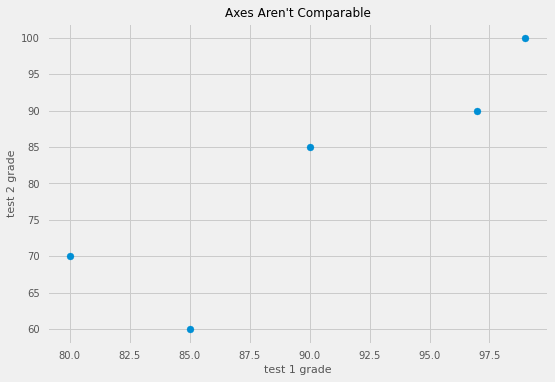

In [14]:
plt.style.use('seaborn-notebook')

test1Grades = [ 99, 90, 85, 97, 80]
test2Grades = [100, 85, 60, 90, 70]

plt.scatter(test1Grades, test2Grades)

plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

Notice how the ticks in the x-axis are every 2.5 units, but in the y-axis every 5 units and how the graph  
conveys that there is more variation (values are more spread out) in the first test.  

Changing the scaling with `plt.axis('equal')`, we change how the visualization looks and what it  
conveys (i.e., that the variation is bigger in the second test):

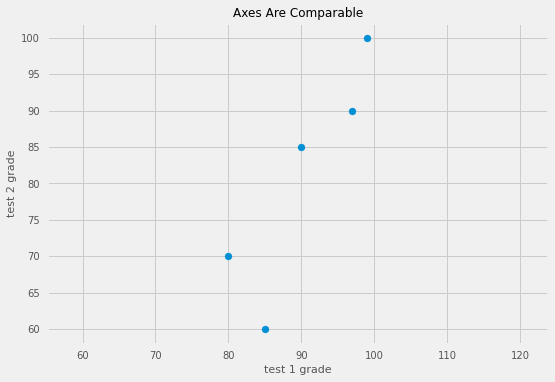

In [15]:
plt.scatter(test1Grades, test2Grades)

plt.title("Axes Are Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.axis('equal')
plt.show()

This looks better in terms of the spread of values.